Twitter is a platform which brings information from all over the globe in a single click of our phone. It also allows those from diverse backgrounds and demographics to voice their opinion on this information. While a group of people have positive feedback on a particular topic, some people also have negative feedback on the same topic. Sentiment analysis analyzes the sentiment of the tweets and classifies the sentiments that are expressed in the text. It uses natural language processing and machine learning algorithms to classify tweets automatically as positive, negative, or neutral based on their content. This helps in understanding the opinion of people on social media for a variety of topics.

In this project, I use machine learning algorithms-Logistic Regression, Naive Bayes and Decision Tree as classifier to analyze the sentiment of the tweets. The performance of these classifier is measured by F1_Score. The aim is to predict the labels on the test dataset. The steps involved in this machine learning problem is:

1.Description of the Data set ---
 (i) Import necessary libraries
 (ii) Read and load the dataset
2.Pre-processing of dataset ---
 (i) Removing Twitter Handles(@user)
 (ii) Removing Punctuation, Numbers, and Special Characters
 (iii) Removing Short Words
 (iv) Tokenization
 (v) Stemming
3.Data Visualization
4.Extract features from cleaned tweets
5.Split Data into Train and Test Data
6.Build the machine learning model ---
 (i) Logistic Regression
 (ii) Naive Bayes Algorithm
 (iii) Decision Tree
7.Model Evaluation & Comparison


1. DESCRIPTION OF THE DATA SET

In [1]:
#Chat GPT Sentiment Analysis using Python
# This code is written by me, as a part of self-learning project.
# The dataset used here is ChatGPT sentiment analysis from Kaagle(https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis).
# import essential libraries to work with
import numpy as np 
# numpy for linear algebra & matrices
import pandas as pd
#to manipulate data & analyze
import nltk
import string
# to create application for statical natural language processing
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob # process textual data

In [2]:
from wordcloud import WordCloud
import seaborn as sns
#data exploration and data visualization
sns.set_style("whitegrid") # Plottinf style
np.random.seed(7) #seed random number generator
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)

In [3]:
# read and load dataset
pd.set_option('display.max_columns',None)
data=pd.read_csv('/Users/Pravy/OneDrive/Desktop/chatgpt.csv')

In [4]:
data_original=data.copy()

In [5]:
data.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [6]:
data=data.sort_values("Unnamed: 0", ascending=True)

In [7]:
data.describe()

,Unnamed: 0
count,219294.000000
mean,109646.500000
std,63304.869303
min,0.000000
25%,54823.250000
50%,109646.500000
75%,164469.750000
max,219293.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.1, random_state=0)
print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 197364
No. of testing examples: 21930


In [10]:
test_data.drop('labels', inplace=True, axis=1)

2. DATA PRE-PROCESSING

In [12]:
combine = train_data._append(test_data, ignore_index=True, sort=True)

In [14]:
#data cleaning
def remove_pattern(text,pattern):
    # re.findall() finds the pattern i.e @user and puts it in a list 
    r = re.findall(pattern,text)
    # re.sub() removes @user from sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    return text

In [15]:
combine['Twitter handles removed'] = np.vectorize(remove_pattern)(combine['tweets'], "@[\w]*")
combine.head()

,Unnamed: 0,labels,tweets,Twitter handles removed
0,51206,good,"Tons of my brilliant techniques, hacks, code f...","Tons of my brilliant techniques, hacks, code f..."
1,160330,neutral,Amelia's Director of Product Marketing Allan A...,Amelia's Director of Product Marketing Allan A...
2,129400,good,Just interacted with ChatGPT. Impressive. http...,Just interacted with ChatGPT. Impressive. http...
3,129446,good,"This AI Chatbot is SO Smart, it will Take Your...","This AI Chatbot is SO Smart, it will Take Your..."
4,210106,bad,AI tools that didn't exist one year ago:\n\nCh...,AI tools that didn't exist one year ago:\n\nCh...


In [17]:
#Remove Punctuation, Numbers, and Special Characters from tweets
combine['Twitter handles removed'] = combine['Twitter handles removed'].str.replace("[^a-zA-Z#]", " ")
combine.head()

,Unnamed: 0,labels,tweets,Twitter handles removed
0,51206,good,"Tons of my brilliant techniques, hacks, code f...","Tons of my brilliant techniques, hacks, code f..."
1,160330,neutral,Amelia's Director of Product Marketing Allan A...,Amelia's Director of Product Marketing Allan A...
2,129400,good,Just interacted with ChatGPT. Impressive. http...,Just interacted with ChatGPT. Impressive. http...
3,129446,good,"This AI Chatbot is SO Smart, it will Take Your...","This AI Chatbot is SO Smart, it will Take Your..."
4,210106,bad,AI tools that didn't exist one year ago:\n\nCh...,AI tools that didn't exist one year ago:\n\nCh...


In [18]:
c_hastag= combine.copy()

In [19]:
combine['Twitter handles removed'] = combine['Twitter handles removed'].str.replace(r"\s*#\S+", "")
combine.head()

,Unnamed: 0,labels,tweets,Twitter handles removed
0,51206,good,"Tons of my brilliant techniques, hacks, code f...","Tons of my brilliant techniques, hacks, code f..."
1,160330,neutral,Amelia's Director of Product Marketing Allan A...,Amelia's Director of Product Marketing Allan A...
2,129400,good,Just interacted with ChatGPT. Impressive. http...,Just interacted with ChatGPT. Impressive. http...
3,129446,good,"This AI Chatbot is SO Smart, it will Take Your...","This AI Chatbot is SO Smart, it will Take Your..."
4,210106,bad,AI tools that didn't exist one year ago:\n\nCh...,AI tools that didn't exist one year ago:\n\nCh...


In [20]:
# remove short words from tweets
combine['Twitter handles removed'] = combine['Twitter handles removed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head()

,Unnamed: 0,labels,tweets,Twitter handles removed
0,51206,good,"Tons of my brilliant techniques, hacks, code f...","Tons brilliant techniques, hacks, code repeate..."
1,160330,neutral,Amelia's Director of Product Marketing Allan A...,Amelia's Director Product Marketing Allan Ande...
2,129400,good,Just interacted with ChatGPT. Impressive. http...,Just interacted with ChatGPT. Impressive. http...
3,129446,good,"This AI Chatbot is SO Smart, it will Take Your...","This Chatbot Smart, will Take Your Job.. https..."
4,210106,bad,AI tools that didn't exist one year ago:\n\nCh...,tools that didn't exist year ago:\n\nChatGPT\n...


In [21]:
#tokenize all the cleaned tweets in dataset
token_tweet = combine['Twitter handles removed'].apply(lambda x: x.split())
token_tweet.head()

0    [Tons, brilliant, techniques,, hacks,, code, r...
1    [Amelia's, Director, Product, Marketing, Allan...
2    [Just, interacted, with, ChatGPT., Impressive....
3    [This, Chatbot, Smart,, will, Take, Your, Job....
4    [tools, that, didn't, exist, year, ago:\n\nCha...
Name: Twitter handles removed, dtype: object

In [22]:
from nltk import PorterStemmer
ps = PorterStemmer()
token_tweet = token_tweet.apply(lambda x: [ps.stem(i) for i in x])
token_tweet.head()

0    [ton, brilliant, techniques,, hacks,, code, re...
1    [amelia', director, product, market, allan, an...
2    [just, interact, with, chatgpt., impressive., ...
3    [thi, chatbot, smart,, will, take, your, job.....
4    [tool, that, didn't, exist, year, ago:\n\nchat...
Name: Twitter handles removed, dtype: object

In [23]:
for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])
combine['Twitter handles removed'] = token_tweet
combine.head()

,Unnamed: 0,labels,tweets,Twitter handles removed
0,51206,good,"Tons of my brilliant techniques, hacks, code f...","ton brilliant techniques, hacks, code repeat t..."
1,160330,neutral,Amelia's Director of Product Marketing Allan A...,amelia' director product market allan andersen...
2,129400,good,Just interacted with ChatGPT. Impressive. http...,just interact with chatgpt. impressive. https:...
3,129446,good,"This AI Chatbot is SO Smart, it will Take Your...","thi chatbot smart, will take your job.. https:..."
4,210106,bad,AI tools that didn't exist one year ago:\n\nCh...,tool that didn't exist year ago:\n\nchatgpt\nw...


In [24]:
combine.tail()

,Unnamed: 0,labels,tweets,Twitter handles removed
219289,159570,NaN,Mad scientist creates sentient spaghetti monst...,scientist creat sentient spaghetti monster.\n\...
219290,40977,NaN,"#ChatGPT, surprisingly is really good at being...","#chatgpt, surprisingli realli good be emot sup..."
219291,145686,NaN,I've been using #chatgpt to help me write cmd ...,"i'v been use #chatgpt help write batch files, ..."
219292,96371,NaN,"Alright #ChatGPT, suggest a new #Python librar...","alright #chatgpt, suggest #python librari that..."
219293,5890,NaN,Testing out chatGPT. This thing is amazing htt...,test chatgpt. thi thing amaz https://t.co/omg3...


3. DATA VISUALIZATION

In [26]:
#Data visualization using WordCloud
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from PIL import Image
import urllib
import requests
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer,PorterStemmer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pravy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pravy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pravy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


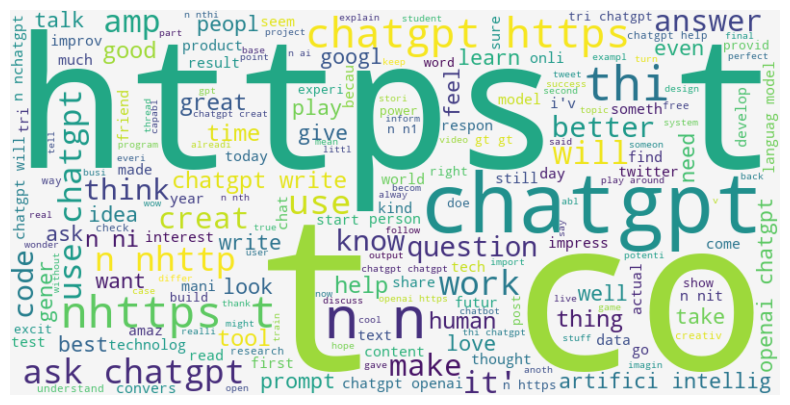

In [27]:
#Generate worldcloud for positive tweets from the dataset
all_words_positive = ' '.join(text for text in combine['Twitter handles removed'][combine['labels']=='good'])
from wordcloud import WordCloud

text_data = combine['Twitter handles removed'].str.cat(sep=' ')

#Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(all_words_positive)

#Displaying the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

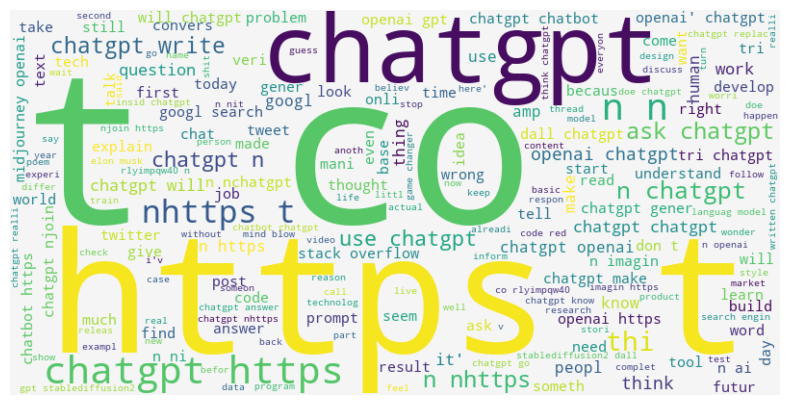

In [28]:
#Generate worldcloud for negative tweets from the dataset
all_words_negative = ' '.join(text for text in combine['Twitter handles removed'][combine['labels']=='bad'])
from wordcloud import WordCloud

text_data = combine['Twitter handles removed'].str.cat(sep=' ')

#Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(all_words_negative)

#Displaying the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

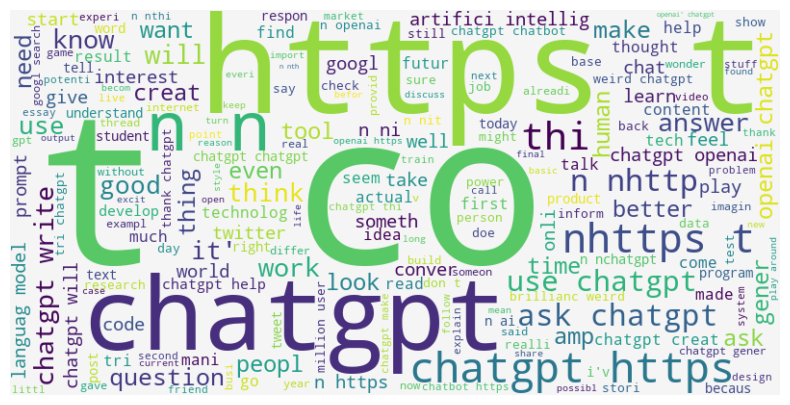

In [29]:
#Generate worldcloud for neutral tweets from the dataset
all_words_neutral = ' '.join(text for text in combine['Twitter handles removed'][combine['labels']=='neutral'])
from wordcloud import WordCloud

text_data = combine['Twitter handles removed'].str.cat(sep=' ')

#Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(all_words_neutral)

#Displaying the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
#Function to extract hashtags from tweets
def Hashtags_Extract(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [31]:
#list of all the hashtags from the positive tweets from the dataset
ht_positive = Hashtags_Extract(c_hastag['Twitter handles removed'][combine['labels']=='good'])
ht_positive

[['ChatGPT'],
 [],
 ['AI', 'ChatGPT', 'YouTube', 'SkillNotTalent'],
 [],
 ['Pisces', 'AIGC', 'Freemint', 'NFT', 'giveaway', 'ChatGPT', 'OpenAI'],
 [],
 [],
 ['ChatGPT', 'Avatar'],
 [],
 ['MachineLearning', 'learning'],
 ['ChatGPT'],
 [],
 ['ChatGPT'],
 ['ChatGPT', 'AI', 'OpenAIChatGPT'],
 ['OpenAI', 'ChatGPT'],
 [],
 [],
 ['OHSCanada', 'AI', 'haiku', 'ChatGPT'],
 [],
 ['ChatGPT'],
 ['ChatGPT'],
 [],
 [],
 ['ChatGPT'],
 [],
 ['medtwitter', 'USMLE'],
 [],
 [],
 ['chatgpt', 'chatgpt'],
 [],
 [],
 [],
 [],
 [],
 ['OpinionampAnalysis', 'ChatGPT', 'GenerativeAI'],
 ['ai', 'ufotwitter'],
 ['tech', 'technology', 'news'],
 [],
 ['OpenAI',
  'ChatGPT',
  'stablediffusion',
  'dreamstudio',
  'scary',
  'monster',
  'safetyfilter',
  'ai'],
 [],
 [],
 ['ChatGPT', 'TwitterFile', 'TwitterFiles', 'TwitterFiles2'],
 ['ChatGPT'],
 [],
 ['pwd', 'ODSPoverty', 'ChatGPT'],
 [],
 [],
 ['ChatGPT', 'jhipster', 'grateful'],
 [],
 [],
 [],
 ['ChatGPT'],
 [],
 [],
 [],
 ['ChatGPT'],
 [],
 ['ChatGPT'],
 ['ChatGP

In [32]:
ht_positive_unnest = sum(ht_positive,[])
ht_positive_unnest

['ChatGPT',
 'AI',
 'ChatGPT',
 'YouTube',
 'SkillNotTalent',
 'Pisces',
 'AIGC',
 'Freemint',
 'NFT',
 'giveaway',
 'ChatGPT',
 'OpenAI',
 'ChatGPT',
 'Avatar',
 'MachineLearning',
 'learning',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'AI',
 'OpenAIChatGPT',
 'OpenAI',
 'ChatGPT',
 'OHSCanada',
 'AI',
 'haiku',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'medtwitter',
 'USMLE',
 'chatgpt',
 'chatgpt',
 'OpinionampAnalysis',
 'ChatGPT',
 'GenerativeAI',
 'ai',
 'ufotwitter',
 'tech',
 'technology',
 'news',
 'OpenAI',
 'ChatGPT',
 'stablediffusion',
 'dreamstudio',
 'scary',
 'monster',
 'safetyfilter',
 'ai',
 'ChatGPT',
 'TwitterFile',
 'TwitterFiles',
 'TwitterFiles2',
 'ChatGPT',
 'pwd',
 'ODSPoverty',
 'ChatGPT',
 'ChatGPT',
 'jhipster',
 'grateful',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'travelwriting',
 'chatGPT',
 'ai',
 'ChatGPT',
 'Raptors',
 'Clippers',
 'ChatGPT',
 'AI',
 'CILDC',
 'artificialintelligence',
 'chatbots',
 'seo',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT'

In [33]:
#list of all the hashtags from the negative tweets from the dataset
ht_negative = Hashtags_Extract(c_hastag['Twitter handles removed'][combine['labels']=='bad'])
ht_negative

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['NCGA', 'ncpol'],
 [],
 [],
 ['chatGPT'],
 [],
 [],
 [],
 [],
 [],
 ['ChatGPT', 'AI', 'global', 'nursing'],
 [],
 [],
 [],
 ['OpenAI', 'ChatGPT', 'DailyPhilosophy'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['chatgpt'],
 [],
 [],
 [],
 [],
 ['Best', 'business', 'makemoneyonline', 'howtomakemoneyonline', 'chatgpt'],
 [],
 [],
 ['ChatGPT'],
 ['ChatGPT'],
 [],
 [],
 ['ChatGPT3', 'nDapp', 'NEO', 'Memes', 'ChatGPT', 'AI'],
 ['Chatbots', 'chatbot'],
 [],
 [],
 ['ChatGPT', 'crypto'],
 [],
 [],
 [],
 [],
 ['ChatGPT', 'OpenAI'],
 [],
 [],
 ['ChatGPT'],
 [],
 [],
 ['ChatGPT'],
 [],
 [],
 [],
 ['ChatGPT'],
 [],
 [],
 ['ChatGPT'],
 [],
 [],
 [],
 ['ChatGPT', 'OpenAI'],
 [],
 [],
 [],
 ['AIEveryone', 'Cobotics'],
 [],
 ['researchtools', 'researchimpact', 'researchvisibility', 'openaccess'],
 ['chatgpt', 'chatgptfail', 'ottawasenators'],
 [],
 [],
 [],
 [],
 ['ChatGPT', 'DFIR'],
 [],
 ['Chatbot'],
 ['ChatGPT'],
 ['chatgpt', 'midjourney', 'thing'],
 ['ChatGPT

In [34]:
ht_negative_unnest = sum(ht_negative,[])
ht_negative_unnest

['NCGA',
 'ncpol',
 'chatGPT',
 'ChatGPT',
 'AI',
 'global',
 'nursing',
 'OpenAI',
 'ChatGPT',
 'DailyPhilosophy',
 'chatgpt',
 'Best',
 'business',
 'makemoneyonline',
 'howtomakemoneyonline',
 'chatgpt',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT3',
 'nDapp',
 'NEO',
 'Memes',
 'ChatGPT',
 'AI',
 'Chatbots',
 'chatbot',
 'ChatGPT',
 'crypto',
 'ChatGPT',
 'OpenAI',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'OpenAI',
 'AIEveryone',
 'Cobotics',
 'researchtools',
 'researchimpact',
 'researchvisibility',
 'openaccess',
 'chatgpt',
 'chatgptfail',
 'ottawasenators',
 'ChatGPT',
 'DFIR',
 'Chatbot',
 'ChatGPT',
 'chatgpt',
 'midjourney',
 'thing',
 'ChatGPT',
 'DataAnalytics',
 'DigitalMarketing',
 'DigitalAdvertising',
 'DigitalMarketing',
 'digital',
 'marketing',
 'AI',
 'ChatGPT',
 'Google',
 'PostTruth',
 'stablediffusion',
 'ChatGPT',
 'AIArtwork',
 'technology',
 'technologynews',
 'technews',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'wholeworld',
 'AI',
 'ArtificialIntelli

In [50]:
#list of all the hashtags from the neutral tweets from the dataset
ht_neutral = Hashtags_Extract(c_hastag['Twitter handles removed'][combine['labels']=='neutral'])
ht_neutral

[[],
 [],
 ['ChatGPT', 'OpenAI', 'OpenAIChat'],
 [],
 ['OpenAI', 'ChatGPT'],
 [],
 ['ArtificialIntelligence',
  'AI',
  'DataScience',
  '100DaysOfCode',
  'Python',
  'MachineLearning',
  'BigData',
  'DeepLearning',
  'NLP',
  'Robots',
  'IoT'],
 [],
 [],
 [],
 ['ChatGPT',
  'AIart',
  'AIArtistCommunity',
  'AIArtwork',
  'midjourney',
  'artistsontwitter',
  'NFTartists'],
 ['ChatGPT'],
 ['TheTwitterFiles', 'ChatGPT', 'TheWhiteLotus'],
 [],
 [],
 ['OpenAI', 'Google'],
 [],
 [],
 ['openai', 'ChatGPT'],
 ['ChatGPT'],
 [],
 [],
 [],
 [],
 [],
 ['ChatGPT'],
 ['ChatGPT'],
 ['ChatGPT'],
 ['ChatGPT', 'steel', 'metallurgy'],
 [],
 ['ChatGPT'],
 [],
 ['ChatGPT'],
 [],
 [],
 ['INFORMS', 'AI', 'ChatGPT'],
 [],
 [],
 [],
 ['ChatGPT', 'sustainability', 'design'],
 ['ChatGPT'],
 [],
 ['ChatGPT', 'RBA'],
 [],
 ['ChatGPT', 'AIart'],
 [],
 [],
 ['chatgpt', 'miamitech', 'alwayscoding', 'neverleavingtheoffice'],
 ['AI', 'ChatGPT'],
 [],
 ['ChatGPT', 'ArtificialIntelligence', 'OpenAI'],
 [],
 [],
 ['

In [36]:
ht_neutral_unnest = sum(ht_neutral,[])
ht_neutral_unnest

['ChatGPT',
 'OpenAI',
 'OpenAIChat',
 'OpenAI',
 'ChatGPT',
 'ArtificialIntelligence',
 'AI',
 'DataScience',
 '100DaysOfCode',
 'Python',
 'MachineLearning',
 'BigData',
 'DeepLearning',
 'NLP',
 'Robots',
 'IoT',
 'ChatGPT',
 'AIart',
 'AIArtistCommunity',
 'AIArtwork',
 'midjourney',
 'artistsontwitter',
 'NFTartists',
 'ChatGPT',
 'TheTwitterFiles',
 'ChatGPT',
 'TheWhiteLotus',
 'OpenAI',
 'Google',
 'openai',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'ChatGPT',
 'steel',
 'metallurgy',
 'ChatGPT',
 'ChatGPT',
 'INFORMS',
 'AI',
 'ChatGPT',
 'ChatGPT',
 'sustainability',
 'design',
 'ChatGPT',
 'ChatGPT',
 'RBA',
 'ChatGPT',
 'AIart',
 'chatgpt',
 'miamitech',
 'alwayscoding',
 'neverleavingtheoffice',
 'AI',
 'ChatGPT',
 'ChatGPT',
 'ArtificialIntelligence',
 'OpenAI',
 'ChatGPT',
 'chatgpt',
 'rust',
 'linkedIn',
 'machinelearning',
 'ChatGPT',
 'openai',
 'machinelearning',
 'ChatGPT',
 'AIinabox',
 'gameday',
 'ChatGPT',
 'Usability',
 'PUBG',
 'ChatGPT',
 

In [49]:
#frequency of words having positive sentiment from the tweets
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_positive

FreqDist({'ChatGPT': 15717, 'AI': 2974, 'chatgpt': 1965, 'OpenAI': 1490, 'chatGPT': 1266, 'ai': 952, 'ArtificialIntelligence': 542, 'openai': 530, 'artificialintelligence': 384, 'GPT3': 279, ...})

In [38]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_positive.head()

,Hashtags,Count
0,ChatGPT,15717
1,AI,2974
2,YouTube,10
3,SkillNotTalent,1
4,Pisces,231


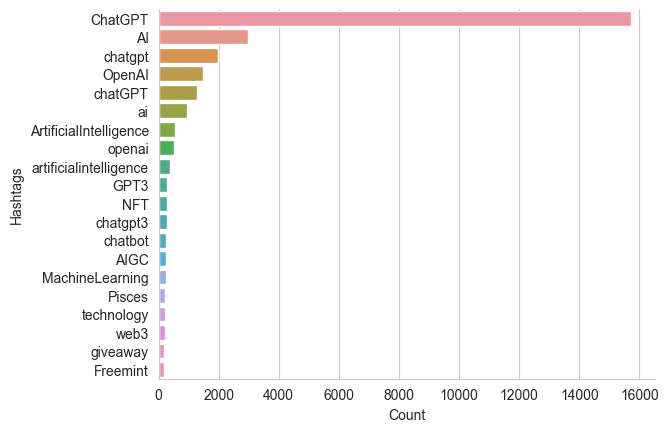

In [39]:
df_positive_plot = df_positive.nlargest(20,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [48]:
#frequency of words having negative sentiment from the tweets
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
word_freq_negative

FreqDist({'ChatGPT': 25157, 'AI': 4528, 'chatgpt': 2998, 'OpenAI': 2260, 'chatGPT': 1987, 'ai': 1595, 'ArtificialIntelligence': 1453, 'MachineLearning': 865, 'openai': 863, 'GPT': 770, ...})

In [41]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})
df_negative.head()

,Hashtags,Count
0,NCGA,1
1,ncpol,1
2,chatGPT,1987
3,ChatGPT,25157
4,AI,4528


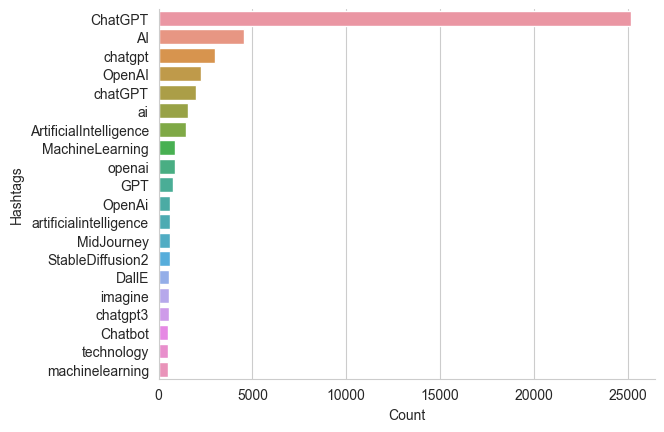

In [42]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [46]:
#frequency of words having neutral sentiment from the tweets
word_freq_neutral = nltk.FreqDist(ht_neutral_unnest)
word_freq_neutral

FreqDist({'ChatGPT': 13826, 'AI': 2609, 'chatgpt': 1754, 'OpenAI': 1366, 'chatGPT': 1083, 'ai': 993, 'ArtificialIntelligence': 783, 'openai': 461, 'artificialintelligence': 435, 'MachineLearning': 369, ...})

In [44]:
df_neutral = pd.DataFrame({'Hashtags':list(word_freq_neutral.keys()),'Count':list(word_freq_neutral.values())})
df_neutral.head()

,Hashtags,Count
0,ChatGPT,13826
1,OpenAI,1366
2,OpenAIChat,114
3,ArtificialIntelligence,783
4,AI,2609


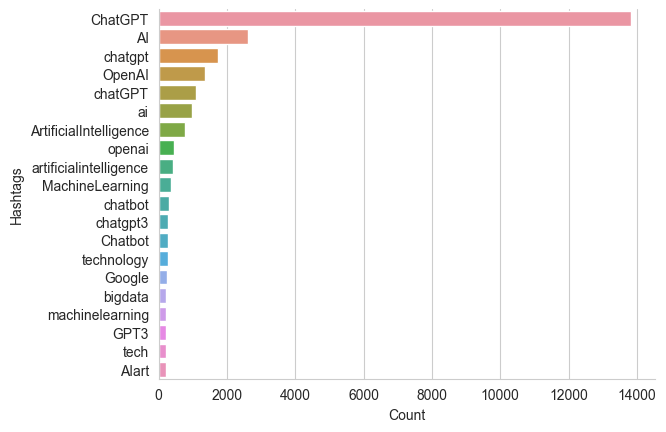

In [45]:
#barplot for the 20 most frequent words used for hashtags
df_neutral_plot = df_neutral.nlargest(20,columns='Count') 
sns.barplot(data=df_neutral_plot,y='Hashtags',x='Count')
sns.despine()

In [47]:
#frequency of words having neutral sentiment from the tweets
word_freq_neutral = nltk.FreqDist(ht_neutral_unnest)
word_freq_neutral

FreqDist({'ChatGPT': 13826, 'AI': 2609, 'chatgpt': 1754, 'OpenAI': 1366, 'chatGPT': 1083, 'ai': 993, 'ArtificialIntelligence': 783, 'openai': 461, 'artificialintelligence': 435, 'MachineLearning': 369, ...})

In [51]:
df_neutral = pd.DataFrame({'Hashtags':list(word_freq_neutral.keys()),'Count':list(word_freq_neutral.values())})
df_neutral.head()

,Hashtags,Count
0,ChatGPT,13826
1,OpenAI,1366
2,OpenAIChat,114
3,ArtificialIntelligence,783
4,AI,2609


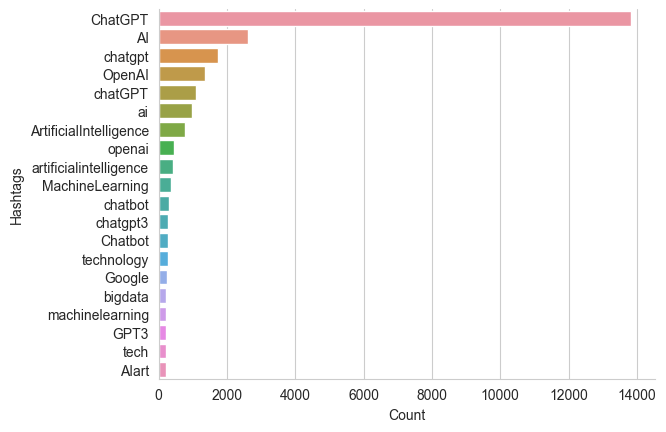

In [52]:
#barplot for the 20 most frequent words used for hashtags
df_neutral_plot = df_neutral.nlargest(20,columns='Count') 
sns.barplot(data=df_neutral_plot,y='Hashtags',x='Count')
sns.despine()

4. EXTRACT FEATURES FROM CLEANED TWEETS

Bag of Words features

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Twitter handles removed'])
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

TD-IDF features

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

#TD-IDF feature matrix
tfidf_matrix=tfidf.fit_transform(combine['Twitter handles removed'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
219289  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
219290  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
219291  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
219292  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
219293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        14   15   16   17   18   19   20   21   22   23   24   25        26   \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.269877   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
219289  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
219290  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
219291  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
219292  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
219293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   

        27   28        29   30   31   32   33   34   35   36   37        38   \
0       0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
1       0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
2       0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
3       0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
4       0.0  0.0  0.170445  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
...     ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
219289  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
219290  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
219291  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
219292  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
219293  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.582108   

        39   40   41   42   43   44   45   46   47   48        49   50   51   \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.274552  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...   
219289  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
219290  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
219291  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
219292  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
219293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

        52   53   54   55   56   57   58   59        60   61   62   63   64   \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
1   

5. SPLIT DATA into TRAIN & TEST DATA

In [56]:
train_bow = bow[:197364]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
train_tfidf_matrix = tfidf_matrix[:197364]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train_data['labels'],test_size=0.1,random_state=0)

In [59]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train_data['labels'],test_size=0.1,random_state=0)

6. MODEL BUILDING

In [61]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


In [68]:
#Model 1 Logistic Regression
#model based on Bag of Words (BoW) approach
logisitic_regressor = LogisticRegression(random_state = 0)
logisitic_regressor.fit(x_train_bow, y_train_bow)
prediction = logisitic_regressor.predict(x_valid_bow)
logistic_f1_bow = f1_score(y_valid_bow, prediction, average='weighted')
logistic_f1_bow

0.7720007071721687

In [65]:
#model based on the TF-IDF approach
logisitic_regressor = LogisticRegression(random_state = 0)
logisitic_regressor.fit(x_train_tfidf, y_train_tfidf)
prediction_tfidf = logisitic_regressor.predict(x_valid_tfidf)
logistic_f1_tfidf = f1_score(y_valid_tfidf, prediction_tfidf,  average='weighted')
logistic_f1_tfidf

0.7542274282593643

In [66]:
#Model 2 Decision Tree classifier
#model based on the Bag of Words (BoW) approach
decision_tree_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
decision_tree_classifier.fit(x_train_bow, y_train_bow)
prediction_bow = decision_tree_classifier.predict(x_valid_bow)
dt_f1_bow = f1_score(y_valid_bow, prediction_bow, average='weighted')
dt_f1_bow

0.46833113870625537

In [67]:
#model based on the TF-IDF approach
decision_tree_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
decision_tree_classifier.fit(x_train_tfidf, y_train_tfidf)
prediction_tfidf = decision_tree_classifier.predict(x_valid_tfidf)
dt_f1_tfidf = f1_score(y_valid_tfidf, prediction_tfidf,  average='weighted')
dt_f1_tfidf

0.47675223209975026

In [69]:
#Model 3 Naive Bayes
#model based on the Bag of Words (BoW) approach
nb = MultinomialNB()
nb.fit(x_train_bow, y_train_bow)
prediction_bow = nb.predict(x_valid_bow)
nb_f1_bow = f1_score(y_valid_bow, prediction_bow, average='weighted')
nb_f1_bow

0.6859672060031861

In [70]:
#model based on the TF-IDF approach
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train_tfidf)
prediction_tfidf = decision_tree_classifier.predict(x_valid_tfidf)
nb_f1_tfidf = f1_score(y_valid_tfidf, prediction_tfidf,  average='weighted')
nb_f1_tfidf

0.47675223209975026

7. MODEL EVALUATION & COMPARISON

In [71]:
approach1 = ['LogisticRegression(Bag-of-Words)','Naive Bayes(Bag-of-Words)','DecisionTree(Bag-of-Words)']
score_1 = [logistic_f1_bow,nb_f1_bow,dt_f1_bow]
compare_1 = pd.DataFrame({'Model':approach1,'F1_Score':score_1},index=[i for i in range(1,4)])
compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),Naive Bayes(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.772001,0.685967,0.468331


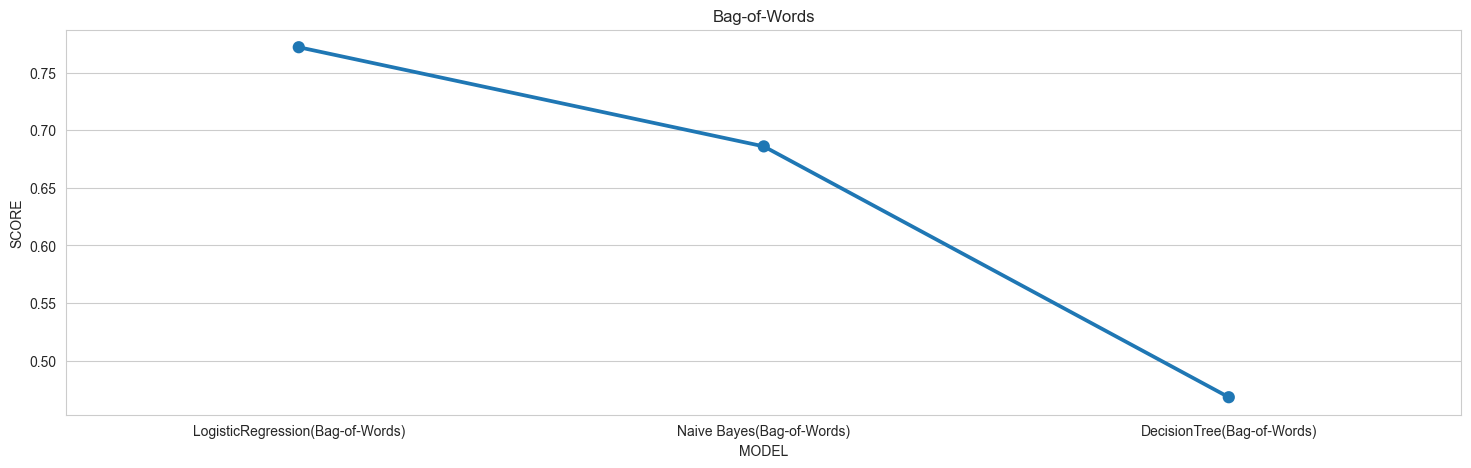

In [72]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='F1_Score',data=compare_1)
plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()

In [73]:
approach2 = ['LogisticRegression(Bag-of-Words)','Naive Bayes(Bag-of-Words)','DecisionTree(Bag-of-Words)']
score_2 = [logistic_f1_tfidf,nb_f1_tfidf,dt_f1_tfidf]
compare_2 = pd.DataFrame({'Model':approach2,'F1_Score':score_2},index=[i for i in range(1,4)])
compare_2.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),Naive Bayes(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.754227,0.476752,0.476752


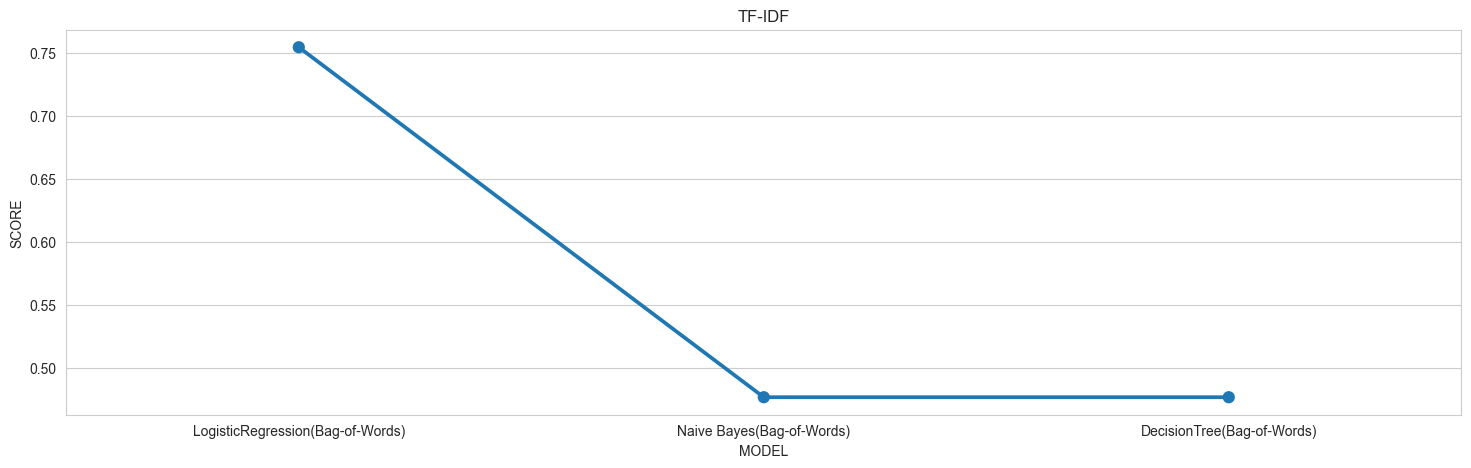

In [74]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='F1_Score',data=compare_2)
plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()

In [75]:
Approach = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']
score_best = [logistic_f1_bow,logistic_f1_tfidf]
compare_best = pd.DataFrame({'Model':Approach,'F1_Score':score_best},index=[i for i in range(1,3)])
compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.772001,0.754227


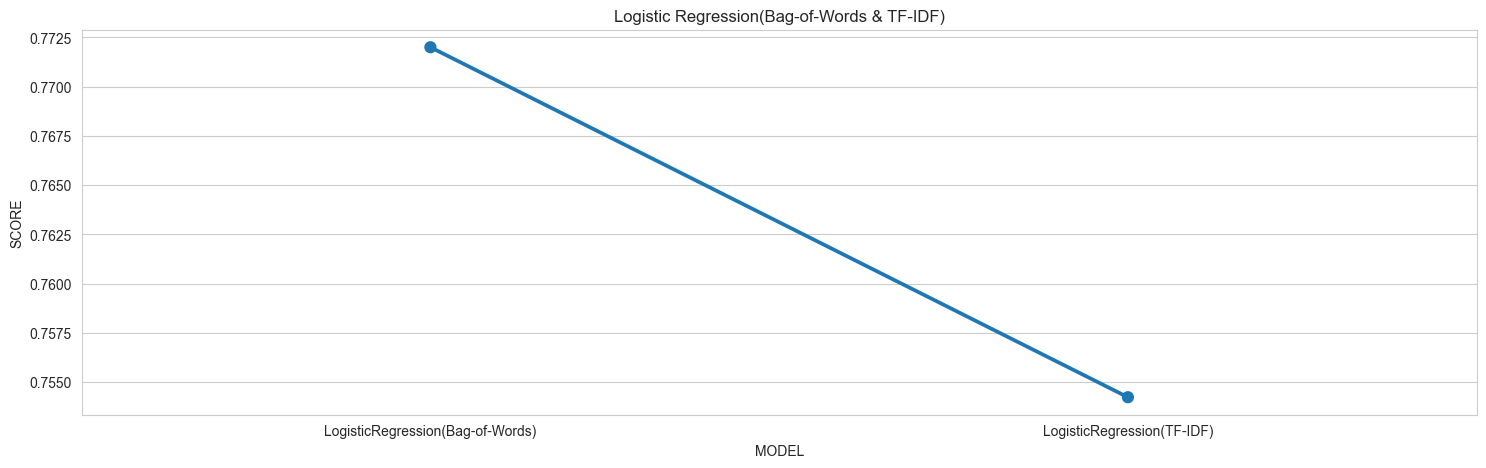

In [76]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='F1_Score',data=compare_best)
plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()